### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')
df = data

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [8]:
# Here I adjusted the values in age so I can treat the metric as an int. The purpose was to find the mean, median, etc of age 
# However, after doing this, I realize that I could have probably kept the column in string format since the ages are 
# more of a discrete value rather than a continuous value
df.groupby('age').size()
df['age'] = df['age'].replace(['50plus', 'below21'], ['51', '20'])
df['age'] = df['age'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [7]:
# We discover that almost all of the car values are null ! 
null_count = df.isnull().sum()
null_count

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Let's just remove the car volume. There are not enough values for it to be useful

df.drop('car', axis = 1, inplace = True)

In [9]:
#let's remove the other null values. It is a small enough subset that it does not impair my analysis
df = df.dropna()


4. What proportion of the total observations chose to accept the coupon? 



In [10]:
# This is the long way to find the proportion that accepted the coupon
# Rather than the code below I could have simply found the mean of column "Y"

accepted = df[df['Y']==1]
accepted_count = accepted['Y'].sum()
accepted_perc = accepted_count / df['Y'].count()
accepted_perc = format(accepted_perc*100, "0.1f") + "%"
accepted_perc = accepted_perc + " accepted the coupon"
accepted_perc
# print(type(accepted_perc))
    #accepted_perc

'56.9% accepted the coupon'

5. Use a bar plot to visualize the `coupon` column.

In [11]:
# I wanted to group the bar to show Accepted and Denied values side by side
# Thus, I did some manipulation to get the data in a format I like

acceptedDf = accepted.groupby('coupon').size().reset_index().set_index('coupon')
acceptedDf.columns = ['Accepted']
acceptedDf

denied = df[df['Y']==0]
deniedDf = denied.groupby('coupon').size().reset_index().set_index('coupon')
deniedDf.columns = ['Denied']

stackedDf = acceptedDf.merge(deniedDf, on='coupon')
stackedDf


,Accepted,Denied
coupon,,
Bar,788,1125
Carry out & Take away,1682,598
Coffee House,1894,1922
Restaurant(20-50),632,785
Restaurant(<20),1881,772


<Axes: title={'center': 'stacked bar'}, xlabel='coupon', ylabel='count'>

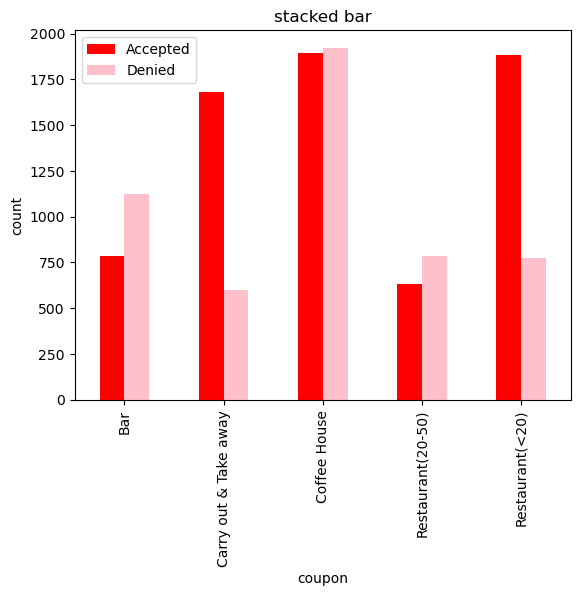

In [14]:
# Here, we see that Carry Out, Restaurants<20, and Coffe Houses were the most popular coupons accepted
# Carryout and Restaurants<20 had a very high acceptance rate ! 

fig4 = stackedDf.plot(kind='bar', stacked=False, color=['red', 'pink'])
plt.ylabel('count')
plt.title('stacked bar')
fig4


In [20]:
# I wanted to look at the percent conversion and not just the total values
stackedDf['Percent Conversion'] = stackedDf['Accepted'] / (stackedDf['Accepted'] + stackedDf['Denied']) 
stackedDf

,Accepted,Denied,Percent Conversion
coupon,,,
Bar,788,1125,0.411918
Carry out & Take away,1682,598,0.737719
Coffee House,1894,1922,0.496331
Restaurant(20-50),632,785,0.446013
Restaurant(<20),1881,772,0.709009


6. Use a histogram to visualize the temperature column.

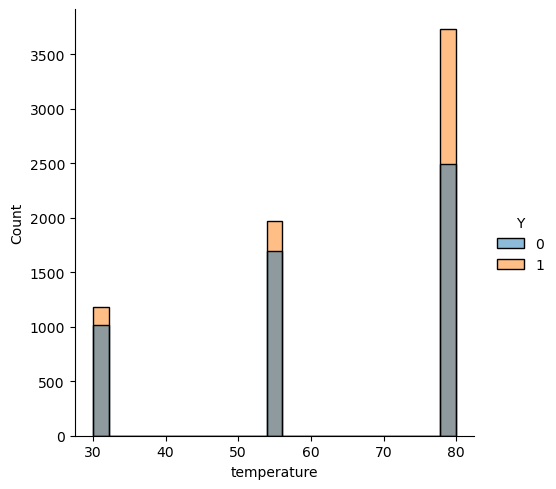

In [18]:
# When the temperature is cold, people do not want to use coupons ! I don't blame them.... 
# Interesting, this graph would probably look better if the column was a string format

histPlot = sns.displot(df, x='temperature', hue = 'Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
barDf = df[df['coupon']=='Bar']
barDf

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [23]:
# Here we use the "easier" method for finding the proportino of values that are accepts 
barDf['Y'].mean()
# 41% bar coupons were accepted 

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
# Let's create two dataframes, that are filtered based on the Bar column 
# Rather than manually finding each acceptance rate, let's create a function that will calculate it for us
# People that go to the bar are WAY more likely to use a bar coupon

list_a = ['never', 'less1', '1~3']
check2 = barDf.groupby('Bar').size()
barLow = barDf[(df['Bar'].isin(list_a))]
barHigh= barDf[~(df['Bar'].isin(list_a))]

def calculate_propertion(df, column):
    return df[column].sum() / len(df)
barHighPerc = calculate_propertion(barHigh, 'Y')
barLowPerc = calculate_propertion(barLow, 'Y')
(barHighPerc, barLowPerc)


C:\Users\blake\AppData\Local\Temp\ipykernel_6932\177187846.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  barLow = barDf[(df['Bar'].isin(list_a))]
C:\Users\blake\AppData\Local\Temp\ipykernel_6932\177187846.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  barHigh= barDf[~(df['Bar'].isin(list_a))]


(0.7616580310880829, 0.37267441860465117)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
# Acceptance rate of all others for comparison
df['Y'].mean()

0.5693352098683666

In [31]:
# I know I will want to slice and dice data in different ways
# Thus, let's create a functino that let's us fitler the dataframe based on columns and values
# People that go to a bar one a month and are over the age of 25 are ~6% more likely to accept the coupon

def explore_group(df, groupname, column1, c1value1, c1value2, column2, c2value1):
    df[groupname] = (
                        (df[column1]!=c1value1) 
                         & (df[column1]!=c1value2)
                         & (df[column2]>c2value1)
                    ).astype(int)
    mean_y = df[df[groupname] == 1]['Y'].mean()
    return mean_y

mean_y = explore_group(df, 'Check', 'Bar', 'never', 'less1', 'age', 25) 
mean_y


C:\Users\blake\AppData\Local\Temp\ipykernel_6932\2690300697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[groupname] = (


0.6230366492146597

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [32]:
# Used a different methodology to calcualte this acceptance rate
# These folks are high responders to coupons ! 

exclude_list_a = ['never', 'less1']
exclude_list_b = ['Alone', 'Kid(s)']
exclude_list_c = ['farming', 'fishing', 'forestry']

df1 = df[ ~(df['Bar'].isin(exclude_list_a)) 
         & ~(df['passanger'].isin(exclude_list_b))
         & ~(df['occupation'].isin(exclude_list_c))
        ]
df1['Y'].mean()

0.6926470588235294

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [33]:
# I believe this is how you can group filtergroups and included the OR statement in between

exclude_list_a = ['never', 'less1']
include_list_b = ['gt8', '4~8']
include_list_c = ['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                 '$100000 or More']

df2 = df[ (
        ~(df['Bar'].isin(exclude_list_a)) 
         & (df['age'] < 30 )
            ) 
         |
    (
    ~(df['Bar'].isin(exclude_list_a))
    & ~(df['passanger'].isin(['Kid(s)']))
    & ~(df['maritalStatus'].isin(['widowed']))  
    )
        |
        (
        (df['RestaurantLessThan20'].isin(include_list_b))
        & (df['income'].isin(include_list_c)) 
        )
        
        ]
df2['Y'].mean()

0.6011549566891241

In [34]:
# go to bars more than once a month and are under the age of 30
# Using this and the fitlers below to check the data
df3 = df[ (
        ~(df['Bar'].isin(exclude_list_a)) 
         & (df['age'] < 30 )
            ) ]
# df3.info()
df3['Y'].mean()

0.6291512915129152

In [35]:
# go to bars more than once a month, 
# had passengers that were not a kid, and were not widowed
df4 = df[ 
    (
    ~(df['Bar'].isin(exclude_list_a))
    & ~(df['passanger'].isin(['Kid(s)']))
    & ~(df['maritalStatus'].isin(['widowed']))  
    ) ]
# df4.info()
df4['Y'].mean()    

0.625

In [36]:
# go to cheap restaurants more than 4 times a month 
# and income is less than 50K
df5 = df[ 
        (
        (df['RestaurantLessThan20'].isin(include_list_b))
        & (df['income'].isin(include_list_c)) 
        )
        ]
df5['Y'].mean()

0.5787385957953193

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Folks that go to the bar tend to not have a kid in the car and are alone while driving. 
# They are also somewhat "frequent" bar goers. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# In my independent investigation, I did two main things: 
# 1) Build a Plotly Dash App to quickly filter charts by various criteria
# 2) Transformed the dataset using one-hot to look at the Category Values in more detail 

# Using method #2 provides a great method to see how the acceptance rate varies within category values

In [57]:
# To do the one-hot method, I convert all of the columns to string objects BESIDES the "Y" column

dfff = df
for col in dfff.columns:
    if col != 'Y':
        dfff[col] = dfff[col].astype(str)
# dfff.info()

C:\Users\blake\AppData\Local\Temp\ipykernel_6932\3093486892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff[col] = dfff[col].astype(str)


In [58]:
# Here we use one-hot to structure a new dataframe
df_encoded = pd.get_dummies(dfff, drop_first=True)
# df_encoded.info()

In [59]:
# I wanted to find the acceptance rate for folks that had the values for those who did not have the value
# Here, I limited the dataset to just those in destination column as a trial before doing it to the broader dataset/

# List of all 'destination' columns
destination_cols = [col for col in df_encoded.columns if 'destination' in col]

# DataFrame to store acceptance rates
acceptance_rates = pd.DataFrame()

for col in destination_cols:
    # Calculate acceptance rate for each destination
    acceptance_rate = df_encoded.groupby(col).mean()['Y']
    
    # Add to DataFrame
    acceptance_rates[col] = acceptance_rate
    
acceptance_rates


,destination_No Urgent Place,destination_Work
destination_No Urgent Place,,
0,0.506138,0.591165
1,0.634003,0.503968


In [61]:
# Alright, time for the show. Here, I want to find the acceptance rate for all value options and compare the 
# acceptance rate when the value was selected vs when it was not selected
# We see that the folks that had the highest acceptance rate for coupons were those found below

# Convert all columns except for 'Y' to string objects
destination_cols = [col for col in df_encoded.columns if col !='Y']

# DataFrame to store acceptance rates
acceptance_rates = pd.DataFrame()

for col in destination_cols:
    # Calculate acceptance rate for each value
    acceptance_rate = df_encoded.groupby(col).mean()['Y']
    
    # Add to DataFrame
    acceptance_rates[col] = acceptance_rate
    

 # Transpose for easier viewing
acceptance_rates = acceptance_rates.transpose()

 # Reset index and rename columns
acceptance_rates.reset_index(inplace=True)
acceptance_rates.columns = ['Value', 'Acceptance Rate for 0', 'Acceptance Rate for 1']
acceptance_rates['Category'] = acceptance_rates['Value'].str.split('_').str[0]
acceptance_rates['Value'] = acceptance_rates['Value'].str.split('_').str[1:].str.join('_')
acceptance_rates['Value Comparison'] = acceptance_rates['Acceptance Rate for 1'] - acceptance_rates['Acceptance Rate for 0']
acceptance_rates = acceptance_rates[['Category', 'Value', 'Acceptance Rate for 1', 'Acceptance Rate for 0', 'Value Comparison']]

acceptance_rates = acceptance_rates.sort_values(by='Value Comparison', ascending=False)


# Display the DataFrame
acceptance_rates.head(10)

,Category,Value,Acceptance Rate for 1,Acceptance Rate for 0,Value Comparison
13,coupon,Carry out & Take away,0.737719,0.530156,0.207563
16,coupon,Restaurant(<20),0.709009,0.530023,0.178985
45,occupation,Healthcare Practitioners & Technical,0.716216,0.566585,0.149631
34,education,Some High School,0.715909,0.568260,0.147650
2,passanger,Friend(s),0.676302,0.531631,0.144671
53,occupation,Production Occupations,0.704545,0.568343,0.136203
46,occupation,Healthcare Support,0.698347,0.566698,0.131649
0,destination,No Urgent Place,0.634003,0.506138,0.127865
6,weather,Sunny,0.595042,0.469734,0.125309
41,occupation,Construction & Extraction,0.688312,0.567799,0.120513


In [46]:
# I realize that percentage can be misleading, thus I also want to find the number of times the value was included
# I could have likely used a groupby.size() rather than the below function 


# Convert all columns except for 'Y' to string objects
destination_cols = [col for col in df_encoded.columns if col !='Y']

# Sum up each column to figure out the number of coupons per value
total_coupons = df_encoded.sum()
total_coupons = pd.DataFrame(total_coupons)
total_coupons.reset_index(inplace=True)

# Clean up the table to join it back to acceptance_rates
total_coupons.columns = ['Value', 'Total Coupons']
total_coupons['Category'] = total_coupons['Value'].str.split('_').str[0]
total_coupons['Value'] = total_coupons['Value'].str.split('_').str[1:].str.join('_')
total_coupons.head()

,Value,Total Coupons,Category
0,,6877,Y
1,No Urgent Place,5970,destination
2,Work,3024,destination
3,Friend(s),3148,passanger
4,Kid(s),938,passanger


In [47]:
# I wanted to merge the Total Coupons onto the other data so I can filter smaller sample sizes

# total_coupons()
acceptance_table = pd.merge(acceptance_rates, total_coupons, on=['Category', 'Value'], how='left')
acceptance_table.head()

,Category,Value,Acceptance Rate for 1,Acceptance Rate for 0,Value Comparison,Total Coupons
0,coupon,Carry out & Take away,0.737719,0.530156,0.207563,2280
1,coupon,Restaurant(<20),0.709009,0.530023,0.178985,2653
2,occupation,Healthcare Practitioners & Technical,0.716216,0.566585,0.149631,222
3,education,Some High School,0.715909,0.568260,0.147650,88
4,passanger,Friend(s),0.676302,0.531631,0.144671,3148


In [64]:
# Here, I filtered out smaller sample sizes to find the top 10 accepter criteria 

acceptance_table_filtered = acceptance_table[acceptance_table['Total Coupons'] > 1000]
acceptance_table_filtered.info()
acceptance_table_filtered.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 92
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               60 non-null     object 
 1   Value                  60 non-null     object 
 2   Acceptance Rate for 1  60 non-null     float64
 3   Acceptance Rate for 0  60 non-null     float64
 4   Value Comparison       60 non-null     float64
 5   Total Coupons          60 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.3+ KB


,Category,Value,Acceptance Rate for 1,Acceptance Rate for 0,Value Comparison,Total Coupons
0,coupon,Carry out & Take away,0.737719,0.530156,0.207563,2280
1,coupon,Restaurant(<20),0.709009,0.530023,0.178985,2653
4,passanger,Friend(s),0.676302,0.531631,0.144671,3148
7,destination,No Urgent Place,0.634003,0.506138,0.127865,5970
8,weather,Sunny,0.595042,0.469734,0.125309,9601
10,time,2PM,0.660752,0.552101,0.108651,1916
14,Bar,4~8,0.637571,0.562812,0.074759,1054
15,CoffeeHouse,4~8,0.631103,0.559501,0.071602,1659
16,Check,1,0.623037,0.554067,0.068970,2674
17,maritalStatus,Single,0.610288,0.544253,0.066035,4588


In [65]:
# I like this view ! It allows one to look across Categories and understand how the values compare within the Category
category_group = acceptance_table_filtered.sort_values(by=['Category', 'Total Coupons'])
category_group

,Category,Value,Acceptance Rate for 1,Acceptance Rate for 0,Value Comparison,Total Coupons
14,Bar,4~8,0.637571,0.562812,0.074759,1054
48,Bar,less1,0.568356,0.569718,-0.001362,3394
75,Bar,never,0.528780,0.597341,-0.068561,4934
40,CarryAway,gt8,0.580420,0.567676,0.012744,1573
79,CarryAway,less1,0.502235,0.581009,-0.078774,1790
37,CarryAway,4~8,0.580456,0.563657,0.016799,4083
16,Check,1,0.623037,0.554067,0.068970,2674
39,CoffeeHouse,gt8,0.583258,0.567925,0.015333,1111
15,CoffeeHouse,4~8,0.631103,0.559501,0.071602,1659
91,CoffeeHouse,never,0.455119,0.604639,-0.149519,2852


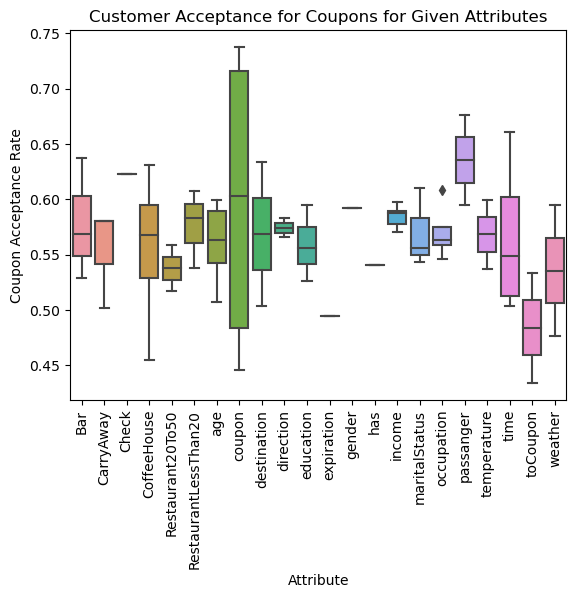

In [66]:
# The length of the bar indicates the variation with the Attribute Values 
# The type of Coupon shows the biggest behavior change
# The values in the list below seem to have the biggest impact change in behavior, so I observe their individual values below
# ['Bar', 'CoffeeHouse', 'destination', 'coupon', 'time', 'toCoupon', 'weather', 'time', 'passanger']

fig_box = sns.boxplot(data = category_group, x = 'Category', y='Acceptance Rate for 1')
plt.xticks(rotation=90)
plt.title('Customer Acceptance for Coupons for Given Attributes')
plt.ylabel('Coupon Acceptance Rate')
plt.xlabel('Attribute')
plt.show()

In [52]:
columns = ['Bar', 'CoffeeHouse', 'destination', 'coupon', 'time', 'toCoupon', 'weather', 'time', 'passanger']

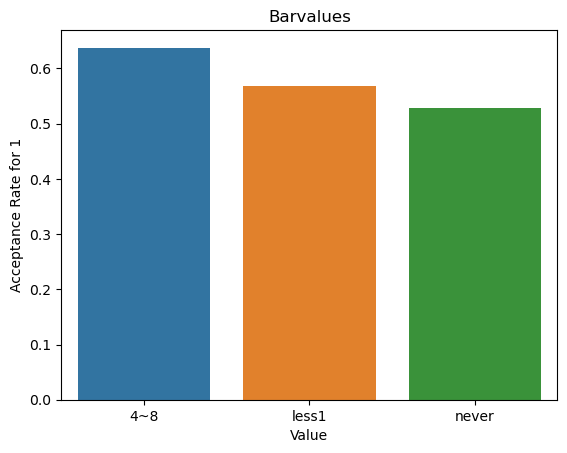

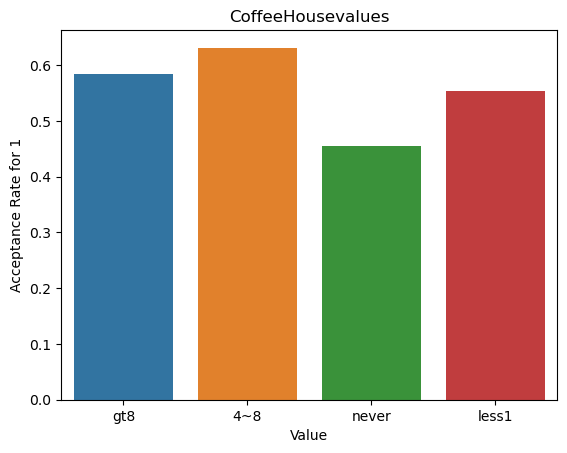

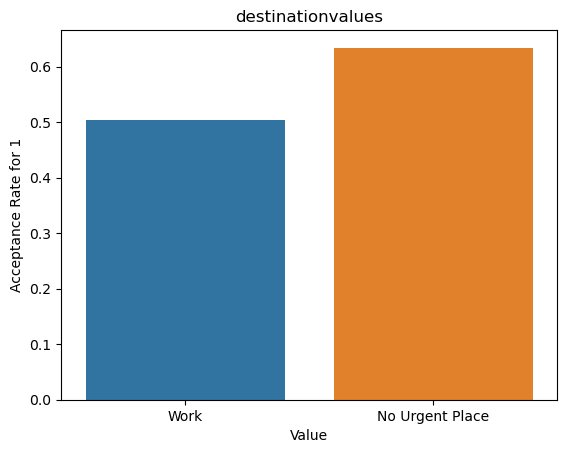

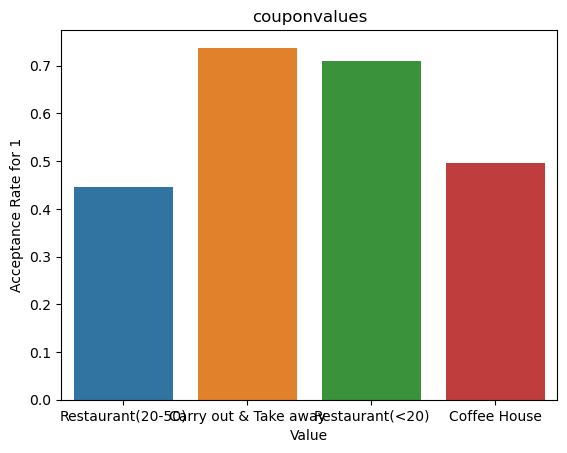

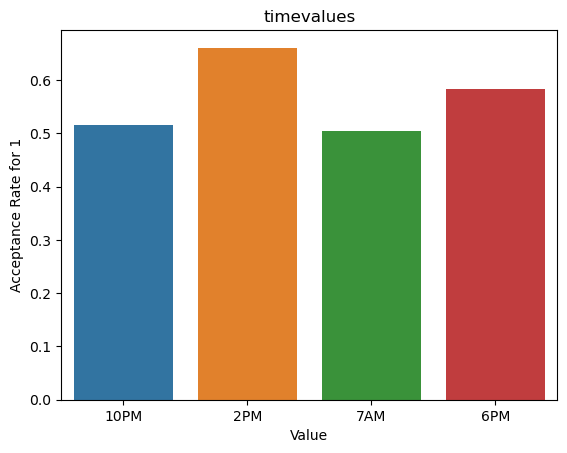

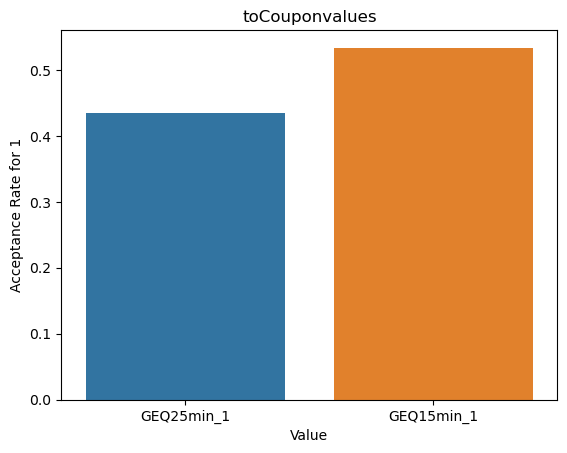

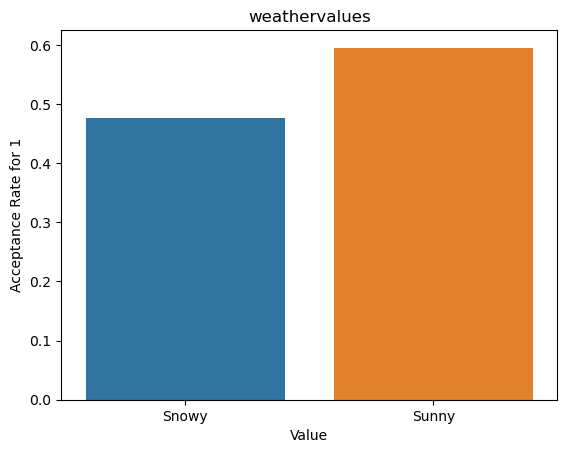

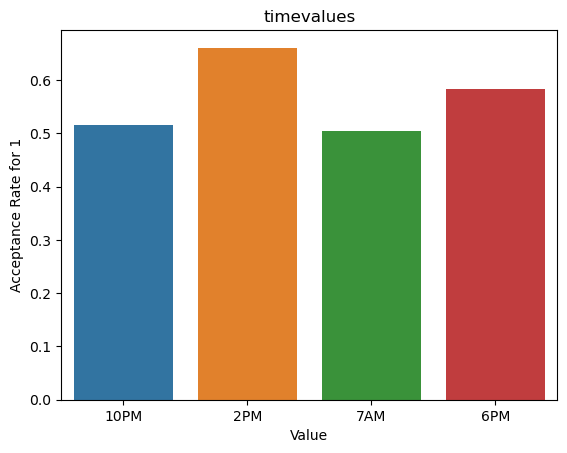

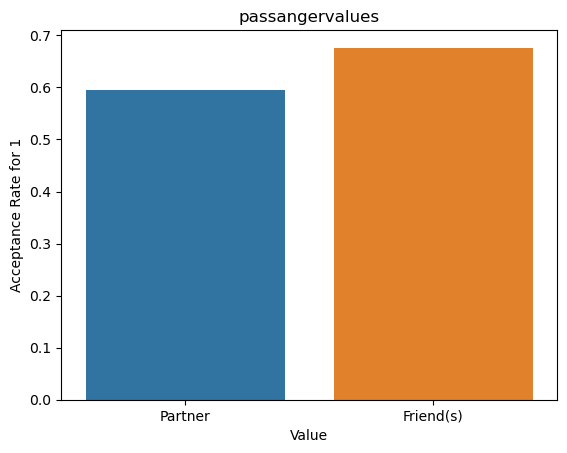

In [53]:
# I initially put these all in different plots... However. I did not find that very effective, so put them on the same plot
for col in columns: 
    dataframe = category_group[category_group['Category']==col]
    sns.barplot(data = dataframe, x='Value', y='Acceptance Rate for 1')
    plt.title(col + 'values')
    plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_6932\1501570640.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Grouping'] = filtered_df['Category'] + ' | ' + filtered_df['Value']


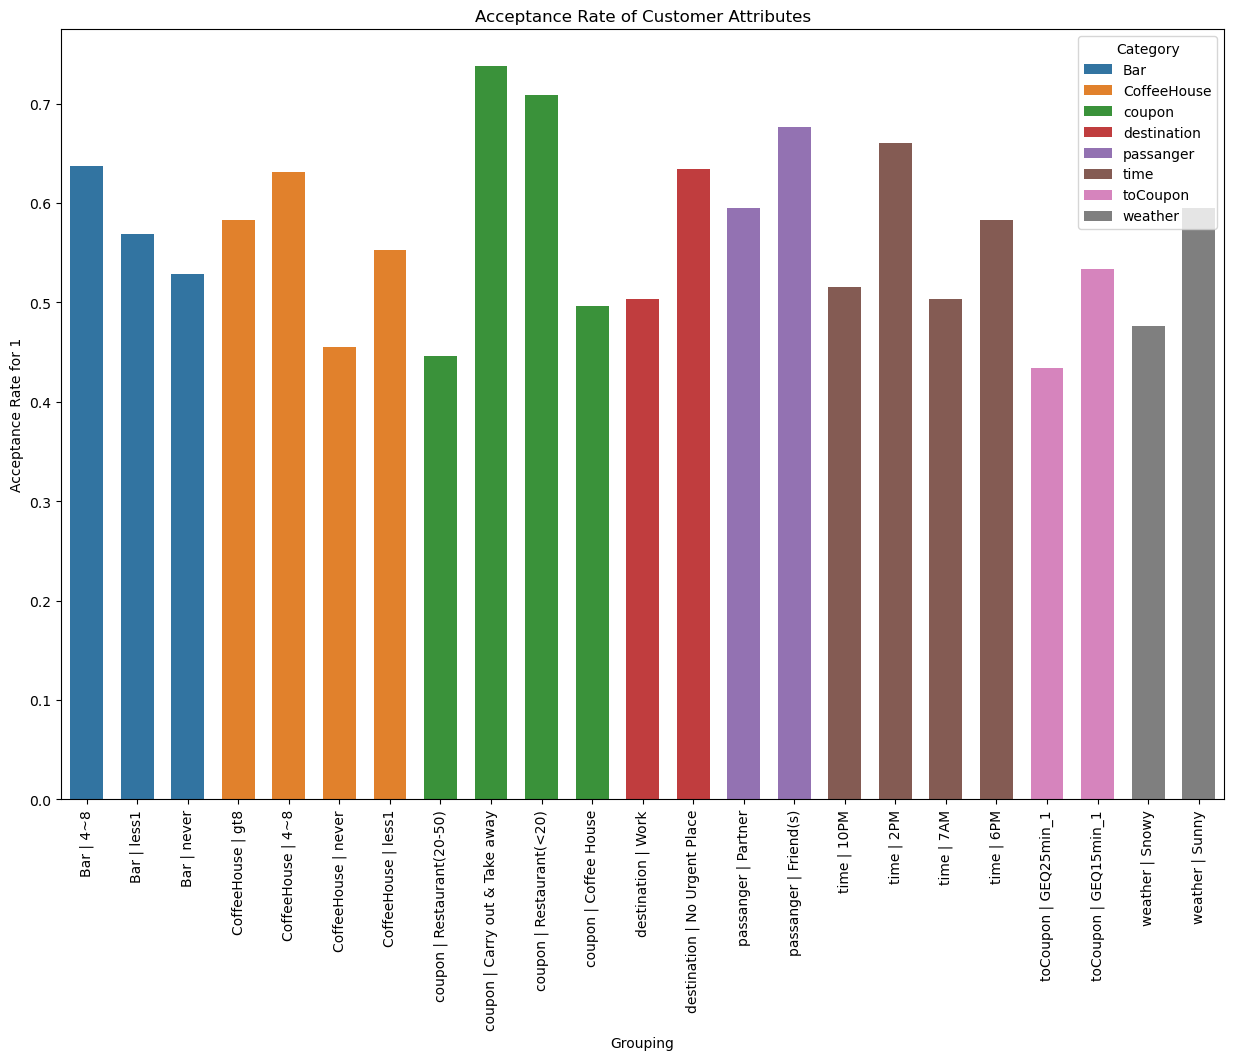

In [69]:
# I like this visual to see acceptance rates by category values ! 
# We can clearly see that folks that often go out (i.e. go to the Bar / Coffee House), are not urgen, have a friend with them, 
# it's a sunny day, its midday, and the coupon is within 15-minutes have the highest success rates !

filtered_df = category_group[category_group['Category'].isin(columns)]
filtered_df['Grouping'] = filtered_df['Category'] + ' | ' + filtered_df['Value']
filtered_df

plt.figure(figsize=(15, 10))

sns.barplot(data = filtered_df, x='Grouping', y='Acceptance Rate for 1', hue='Category', width=0.65, dodge=False)
plt.xticks(rotation=90)
plt.title('Acceptance Rate of Customer Attributes')
plt.show()

In [37]:
# I tried to create plots in plotly, but it for some reason did not want to work. 

def create_grouped_bar(column_chosen2):
    accepted = df[df['Y'] == 1]
    acceptedDf = accepted.groupby(column_chosen2).size().reset_index().set_index(column_chosen2)
    acceptedDf.columns = ['Accepted']

    denied = df[df['Y'] == 0]
    deniedDf = denied.groupby(column_chosen2).size().reset_index().set_index(column_chosen2)
    deniedDf.columns = ['Denied']

    stackedDf = acceptedDf.merge(deniedDf, on=column_chosen2).reset_index()

    fig_bar = px.bar(stackedDf, x=column_chosen2, y=['Accepted', 'Denied'], color_discrete_sequence=['red', 'pink'])
    fig_bar.update_layout(xaxis_title=column_chosen2, yaxis_title='Count', title='Stacked bar')

    return fig_bar